<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<Axes: ylabel='Frequency'>

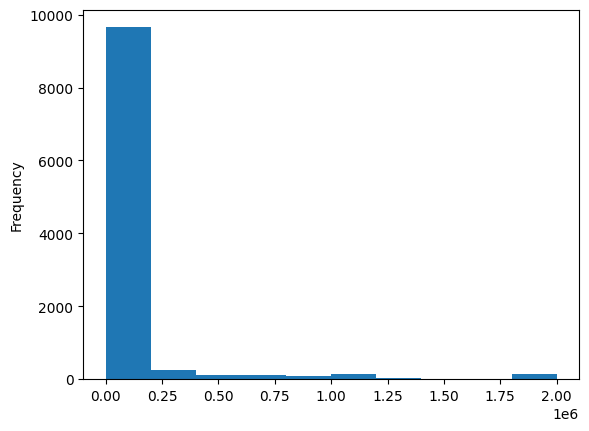

In [3]:
# your code goes here
df['ConvertedComp'].plot(kind='hist')

Plot the histogram for the column `ConvertedComp`.


<Axes: ylabel='Frequency'>

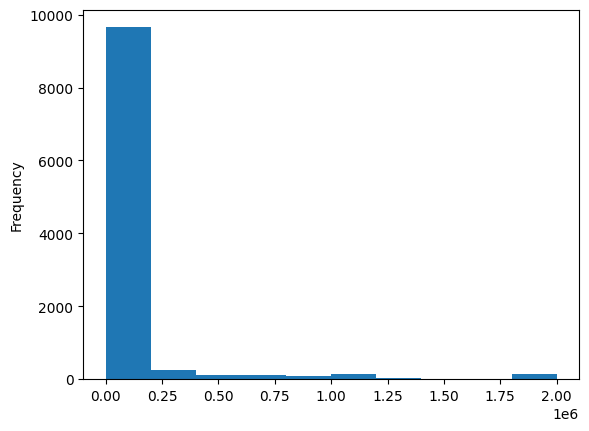

In [4]:
# your code goes here
df['ConvertedComp'].plot(kind='hist')

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
df['ConvertedComp'].median()

np.float64(57745.0)

How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
df.groupby('Gender')['Respondent'].sum()

Gender
Man                                                            131232821
Man;Non-binary, genderqueer, or gender non-conforming             366294
Non-binary, genderqueer, or gender non-conforming                 710530
Woman                                                            8813130
Woman;Man                                                         125877
Woman;Man;Non-binary, genderqueer, or gender non-conforming        24456
Woman;Non-binary, genderqueer, or gender non-conforming           154596
Name: Respondent, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
df[df['Gender'] == 'Woman']['ConvertedComp'].median()

np.float64(57708.0)

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
print(df['Age'].median())
df['Age'].describe()



29.0


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<Axes: ylabel='Frequency'>

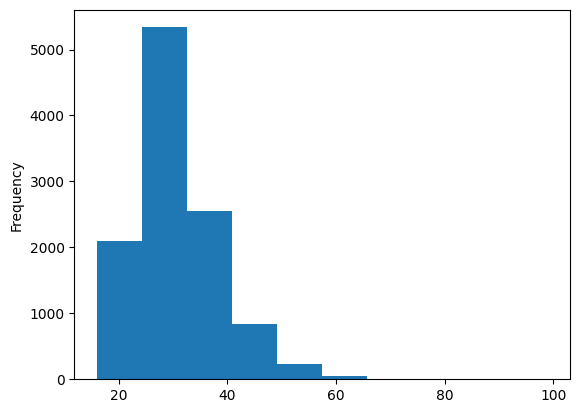

In [9]:
# your code goes here
df['Age'].plot(kind="hist")

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?

57745.0


<Axes: >

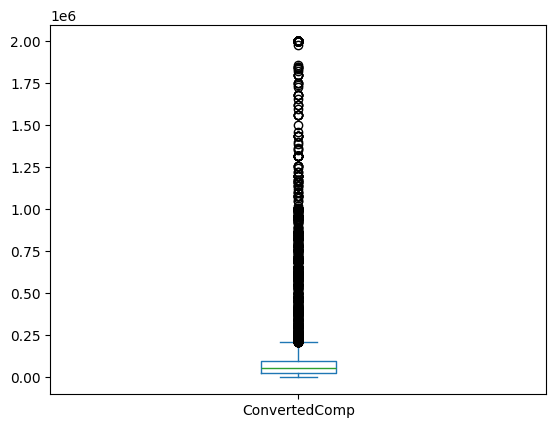

In [10]:
# your code goes here
print(df['ConvertedComp'].median())
df["ConvertedComp"].plot(kind='box')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1
print("IQR = ", IQR)

IQR =  73132.0


Find out the upper and lower bounds.


In [12]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower bounds = ', lower_bound)
print('Upper bound = ', upper_bound)

Lower bounds =  -82830.0
Upper bound =  209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers= len(outliers)
print("Number of outliners = ", num_outliers)
print(df['ConvertedComp'].median())

Number of outliners =  879
57745.0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
# your code goes here
df_no = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print(df_no['ConvertedComp'].median())
print(df_no['ConvertedComp'].mean())
df_no


52704.0
59883.20838915799


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,AgeBin
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,20-29
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,20-29
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,20-29
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,20-29
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11392,25134,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ecuador,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers,32.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,No,Appropriate in length,Easy,30-39
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult,30-39
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,20-29
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy,30-39


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


<Axes: >

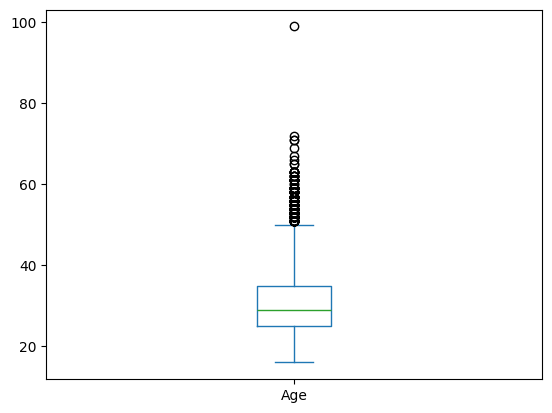

In [17]:
df['Age'].plot(kind='box')

/var/folders/rp/r5y_jptx6pn1w1kh57ynjhkh0000gn/T/ipykernel_13664/874454133.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeBin')['CompTotal'].describe()


<Axes: ylabel='Frequency'>

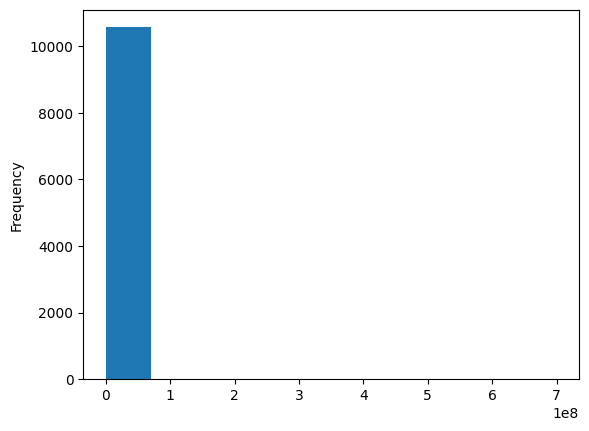

In [28]:
# your code goes here
# Age vs Compensation
bins = range(20, 101, 10)  # Age bins: 20-29, 30-39, ..., 90-99
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df['AgeBin'] = pd.cut(df['Age'], bins=bins, right=False, labels=labels)

df.groupby('AgeBin')['CompTotal'].describe()
df['CompTotal'].plot(kind='hist')

In [21]:
df.groupby('AgeBin')['Respondent'].describe()

/var/folders/rp/r5y_jptx6pn1w1kh57ynjhkh0000gn/T/ipykernel_13664/3617963037.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeBin')['Respondent'].describe()


,count,mean,std,min,25%,50%,75%,max
AgeBin,,,,,,,,
20-29,5645.0,12510.996457,7210.555132,4.0,6395.0,12580.0,18694.00,25141.0
30-39,4040.0,12465.874010,7276.507847,19.0,6161.5,12310.0,18816.50,25142.0
40-49,1029.0,12589.029155,7312.612910,22.0,6210.0,12874.0,19264.00,25097.0
50-59,248.0,12928.564516,6942.974263,111.0,7863.5,13031.5,18997.25,25092.0
60-69,29.0,11722.241379,7874.881948,1312.0,4157.0,12730.0,17731.00,24357.0
70-79,3.0,7529.333333,2511.718602,5064.0,6251.5,7439.0,8762.00,10085.0
80-89,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90-99,1.0,20199.000000,NaN,20199.0,20199.0,20199.0,20199.00,20199.0


In [22]:
df.groupby('AgeBin')['CodeRevHrs'].describe()

/var/folders/rp/r5y_jptx6pn1w1kh57ynjhkh0000gn/T/ipykernel_13664/2618128993.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeBin')['CodeRevHrs'].describe()


,count,mean,std,min,25%,50%,75%,max
AgeBin,,,,,,,,
20-29,4396.0,4.823581,4.784093,0.0,2.0,4.0,5.0,99.0
30-39,3263.0,4.755930,4.057599,0.0,2.0,4.0,5.0,54.0
40-49,816.0,4.547181,3.905220,0.0,2.0,4.0,5.0,60.0
50-59,178.0,4.141011,3.244000,0.0,2.0,4.0,5.0,20.0
60-69,23.0,4.130435,1.866069,1.0,2.5,5.0,5.0,8.0
70-79,2.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
80-89,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90-99,1.0,8.000000,NaN,8.0,8.0,8.0,8.0,8.0


In [25]:
df.groupby('AgeBin')['WorkWeekHrs'].describe()

/var/folders/rp/r5y_jptx6pn1w1kh57ynjhkh0000gn/T/ipykernel_13664/3763079820.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeBin')['WorkWeekHrs'].describe()


,count,mean,std,min,25%,50%,75%,max
AgeBin,,,,,,,,
20-29,5581.0,41.514836,24.280070,3.0,40.0,40.0,42.5,475.0
30-39,4005.0,42.900000,27.738161,4.0,40.0,40.0,42.0,1012.0
40-49,1019.0,43.131698,20.365795,5.0,40.0,40.0,45.0,385.0
50-59,247.0,42.444332,7.696490,10.0,40.0,40.0,45.0,80.0
60-69,29.0,42.637931,9.912921,10.0,40.0,45.0,45.0,65.0
70-79,3.0,35.666667,15.044379,20.0,28.5,37.0,43.5,50.0
80-89,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90-99,1.0,45.000000,NaN,45.0,45.0,45.0,45.0,45.0


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
